In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('sales-cars.csv' )

In [4]:
data.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null int64
dtypes: int64(1), object(1)
memory usage: 656.0+ bytes


In [6]:
# Steps to initiate a Time series Problem
# 1. Ensure the dataset that you hold must have a column that represents time.(in this use-case : month)
# 2. Ensure your time column is represented as datetime datatype in python
# 3. Ensure your time column is an row index for the given dataset
# 4. Check whether the data is stationary or not
# 5. Create train test split to understand the accuracy of the model
# 6. Create the model using train data
# 7. Predict the values for test data and check for accuracy of the model
# 8. If satisified with accuracy, deploy the model to predict the future scope of the domain

In [7]:
from pandas import datetime
def parser(x):
    #2016-01
    return datetime.strptime(x,'%Y-%m')
    

In [12]:
timeData = "2019-01"
print(type(timeData))
finalop = parser(timeData)
print(type(finalop))

<class 'str'>
<class 'datetime.datetime'>


In [8]:
?datetime

In [13]:
data2 = pd.read_csv('sales-cars.csv' , index_col= 0 , parse_dates= [0] , date_parser=parser)

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Sales    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [15]:
data2.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


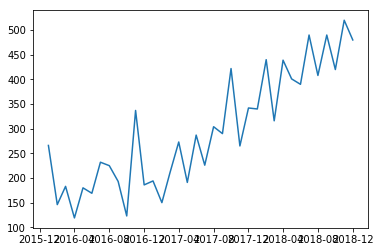

In [16]:
#EDA on sales data
# Your plot is represented as line graph
plt.plot(data2)

In [24]:
# Stationary Data
# Mean, Variance and Covariance must be a CONSTANT over periods
# Perform the check for stationary behaviour using autocoreelation graph
# Requirement for AutoCorelation graph / Arima model is ,
# 1. Data must be a time series data (index is time)
# 2. Data must be integrated with order 1 ( value = Next Value - Current Value)
data2_diff = data2.diff(periods=1)
data2_diff = data2_diff.dropna()
data2_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


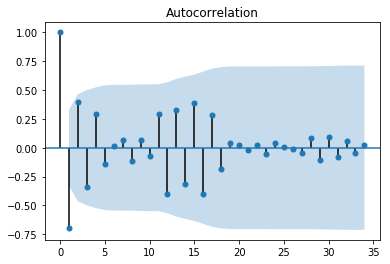

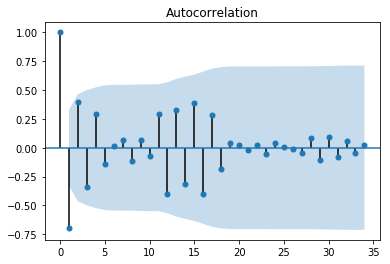

In [25]:
from  statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2_diff)

In [28]:
#Create train test split with 80% 20%
features = data2.values
train = features[0:27]
test = features[27:]

In [29]:
#AR model
from statsmodels.tsa.ar_model import AR
model_AR = AR(train)
model_AR_model = model_AR.fit()

In [38]:
predict = model_AR_model.predict(start = 27, end = 35)

In [39]:
predict.shape

(9,)

In [40]:
test.shape

(9, 1)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(test,predict.reshape(-1,1))

-1.0468089476620457

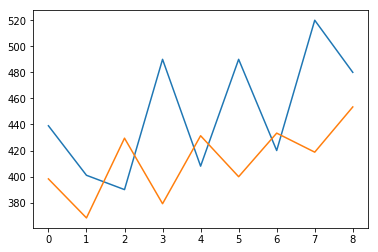

In [44]:
plt.plot(test)
plt.plot(predict)

In [46]:
#Arima model
from statsmodels.tsa.arima_model import ARIMA
#Expectation of Arima is your data must float data
train = train.astype('float64')
test = test.astype('float64')

In [97]:
#Orders in ARIMA
# p,d,q
# p = periods taken for AR model
p = 1
# Integral order
d = 2
# Moving average
q = 3
model_arima = ARIMA(train, order=(p,d,q))
model_arima_fit = model_arima.fit()
model_arima_fit.aic

290.3253394285514

In [98]:
predictions_arima = model_arima_fit.forecast(steps = 9 )[0]

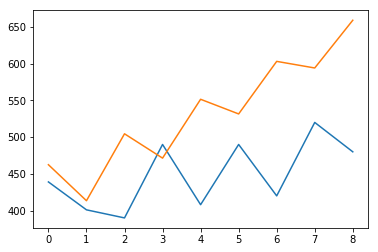

In [99]:
plt.plot(test)
plt.plot(predictions_arima)

In [95]:
import warnings
warnings.filterwarnings('ignore')
import itertools
p=d=q=range(0,6)
pdq = list(itertools.product(p,d,q))
list1Params =[]
list2AIC =[]
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        final = model_arima.fit()
        list1Params.append(param)
        list2AIC.append(final.aic)
        #print(param, final.aic)
    except:
        continue

listTemp = list2AIC.copy()
listTemp.sort()
value = listTemp[0]
print(list1Params[list2AIC.index(value)])

(1, 2, 3)


In [96]:
list2AIC

[319.45285852307086,
 318.72448093894775,
 315.25060028735857,
 nan,
 nan,
 308.88294635187685,
 311.8293983488534,
 296.0841521691394,
 296.3229226907705,
 329.1834958250828,
 306.10194849153686,
 316.16687175281163,
 313.04871744498155,
 310.97906422431186,
 309.67799311427393,
 298.8325442271006,
 297.1256511258498,
 299.4716667062684,
 301.2851180947771,
 306.53077675708374,
 290.3253394285514,
 294.6437633883389,
 310.9969573637468,
 300.2089561239986,
 297.9999930167351,
 298.5505428130331,
 302.87208440931187,
 296.3640101005065,
 306.2975856434048,
 315.5452667216918,
 312.98385874719656,
 310.31327218271804,
 294.85435842186155,
 295.9979353418496,
 292.66862386942466,
 294.658890751664,
 298.36266199574027,
 299.40758681554496,
 294.9913023163731,
 319.8537534713333,
 321.413049310878,
 327.7203719361587,
 295.93436313514695,
 297.90988170603646,
 294.66336105684263,
 296.6455247145618,
 296.5230072443251,
 291.39913447173916,
 292.53002901771674,
 321.3988616312607,
 322.345

In [86]:
list1.sort()


In [88]:
list1[0]

1